In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data(n, change_point, mean1, sigma1, mean2, sigma2):
    """
    Generate Gaussian distribution data with mean change
    """
    data_before_change = np.random.normal(mean1, sigma1, change_point)
    data_after_change = np.random.normal(mean2, sigma2, n - change_point)
    data = np.concatenate((data_before_change, data_after_change))
    return data

In [ ]:
def cusum(data, h):
    """
    Execute the CuSum algorithm and return a list of time points, positive and negative accumulations, and changes detected
    """
    s_pos = 0
    s_neg = 0
    s_pos_list = [0]
    s_neg_list = [0]

    for i in range(1, len(data)):
        s_pos = max(0, s_pos + data[i] - data[i-1] - h)
        s_neg = min(0, s_neg + data[i] - data[i-1] + h)

        s_pos_list.append(s_pos)
        s_neg_list.append(s_neg)

        if s_pos >= h or s_neg <= -h:
            return i, s_pos_list, s_neg_list
    return len(data), s_pos_list, s_neg_list

In [ ]:
def run_experiment(n, change_point, mean1, sigma1, mean2, sigma2, thresholds, num_experiments=100):

    all_results = {}

    for h in thresholds:
        delays = []
        false_alarms = 0

        for _ in range(num_experiments):
            data = generate_data(n, change_point, mean1, sigma1, mean2, sigma2)
            detection_time, s_pos_list, s_neg_list = cusum(data, h)
            delay = detection_time - change_point
            if detection_time < change_point:
                false_alarms += 1
            delays.append(delay)

        avg_delay = np.mean(delays)
        false_alarm_rate = false_alarms / num_experiments
        all_results[h] = {
            'avg_delay': avg_delay,
            'false_alarm_rate': false_alarm_rate,
            's_pos_list': s_pos_list,
            's_neg_list': s_neg_list,
            'detection_time': detection_time if detection_time < len(data) else None,
            'delays': delays
        }
        print(f"h = {h}, Average Delay = {avg_delay}, False Alarm Rate = {false_alarm_rate}")

    # visualization
    plt.figure(figsize=(14, 10))

    # original data source
    plt.subplot(2, 1, 1)
    data = generate_data(n, change_point, mean1, sigma1, mean2, sigma2)
    plt.plot(data, label='Generated Data')
    plt.axvline(x=change_point, color='k', linestyle='--', label='Change Point')
    plt.title('Generated Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

    colors = plt.cm.viridis(np.linspace(0, 1, len(thresholds)))

    plt.subplot(2, 1, 2)
    for idx, h in enumerate(thresholds):
        result = all_results[h]
        plt.plot(result['s_pos_list'], label=f'CuSum Positive (h={h})', color=colors[idx], alpha=0.6)
        if result['detection_time'] is not None:
            plt.axvline(x=result['detection_time'], color=colors[idx], linestyle='--', label=f'Detection Point (h={h})')

    plt.title('CuSum Positive Cumulative Sum')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Sum')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

    plt.tight_layout()
    plt.show()

    return all_results

In [ ]:
def visualize_delays(thresholds, results):
    """
    Visualize detection latency and false positive rate at different thresholds
    """
    avg_delays = [results[h]['avg_delay'] for h in thresholds]
    false_alarm_rates = [results[h]['false_alarm_rate'] for h in thresholds]

    fig, ax1 = plt.subplots(figsize=(14, 5))

    color = 'tab:blue'
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Average Detection Delay', color=color)
    ax1.plot(thresholds, avg_delays, marker='o', color=color, label='Average Detection Delay')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('False Alarm Rate', color=color)
    ax2.plot(thresholds, false_alarm_rates, marker='o', color=color, label='False Alarm Rate')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Average Detection Delay and False Alarm Rate vs Threshold')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    plt.show()


h = 1.8, Average Delay = -601.08, False Alarm Rate = 1.0
h = 1.8323232323232324, Average Delay = -583.84, False Alarm Rate = 1.0
h = 1.8646464646464647, Average Delay = -575.18, False Alarm Rate = 1.0
h = 1.896969696969697, Average Delay = -550.29, False Alarm Rate = 0.99
h = 1.9292929292929293, Average Delay = -535.41, False Alarm Rate = 0.98
h = 1.9616161616161616, Average Delay = -512.07, False Alarm Rate = 0.98
h = 1.993939393939394, Average Delay = -488.89, False Alarm Rate = 0.96
h = 2.026262626262626, Average Delay = -426.48, False Alarm Rate = 0.91
h = 2.0585858585858587, Average Delay = -427.77, False Alarm Rate = 0.94
h = 2.090909090909091, Average Delay = -399.07, False Alarm Rate = 0.9
h = 2.1232323232323234, Average Delay = -396.98, False Alarm Rate = 0.86
h = 2.1555555555555554, Average Delay = -324.65, False Alarm Rate = 0.73
h = 2.187878787878788, Average Delay = -293.34, False Alarm Rate = 0.69
h = 2.22020202020202, Average Delay = -292.96, False Alarm Rate = 0.71
h = 

<ipython-input-73-89b01c6c938b>:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


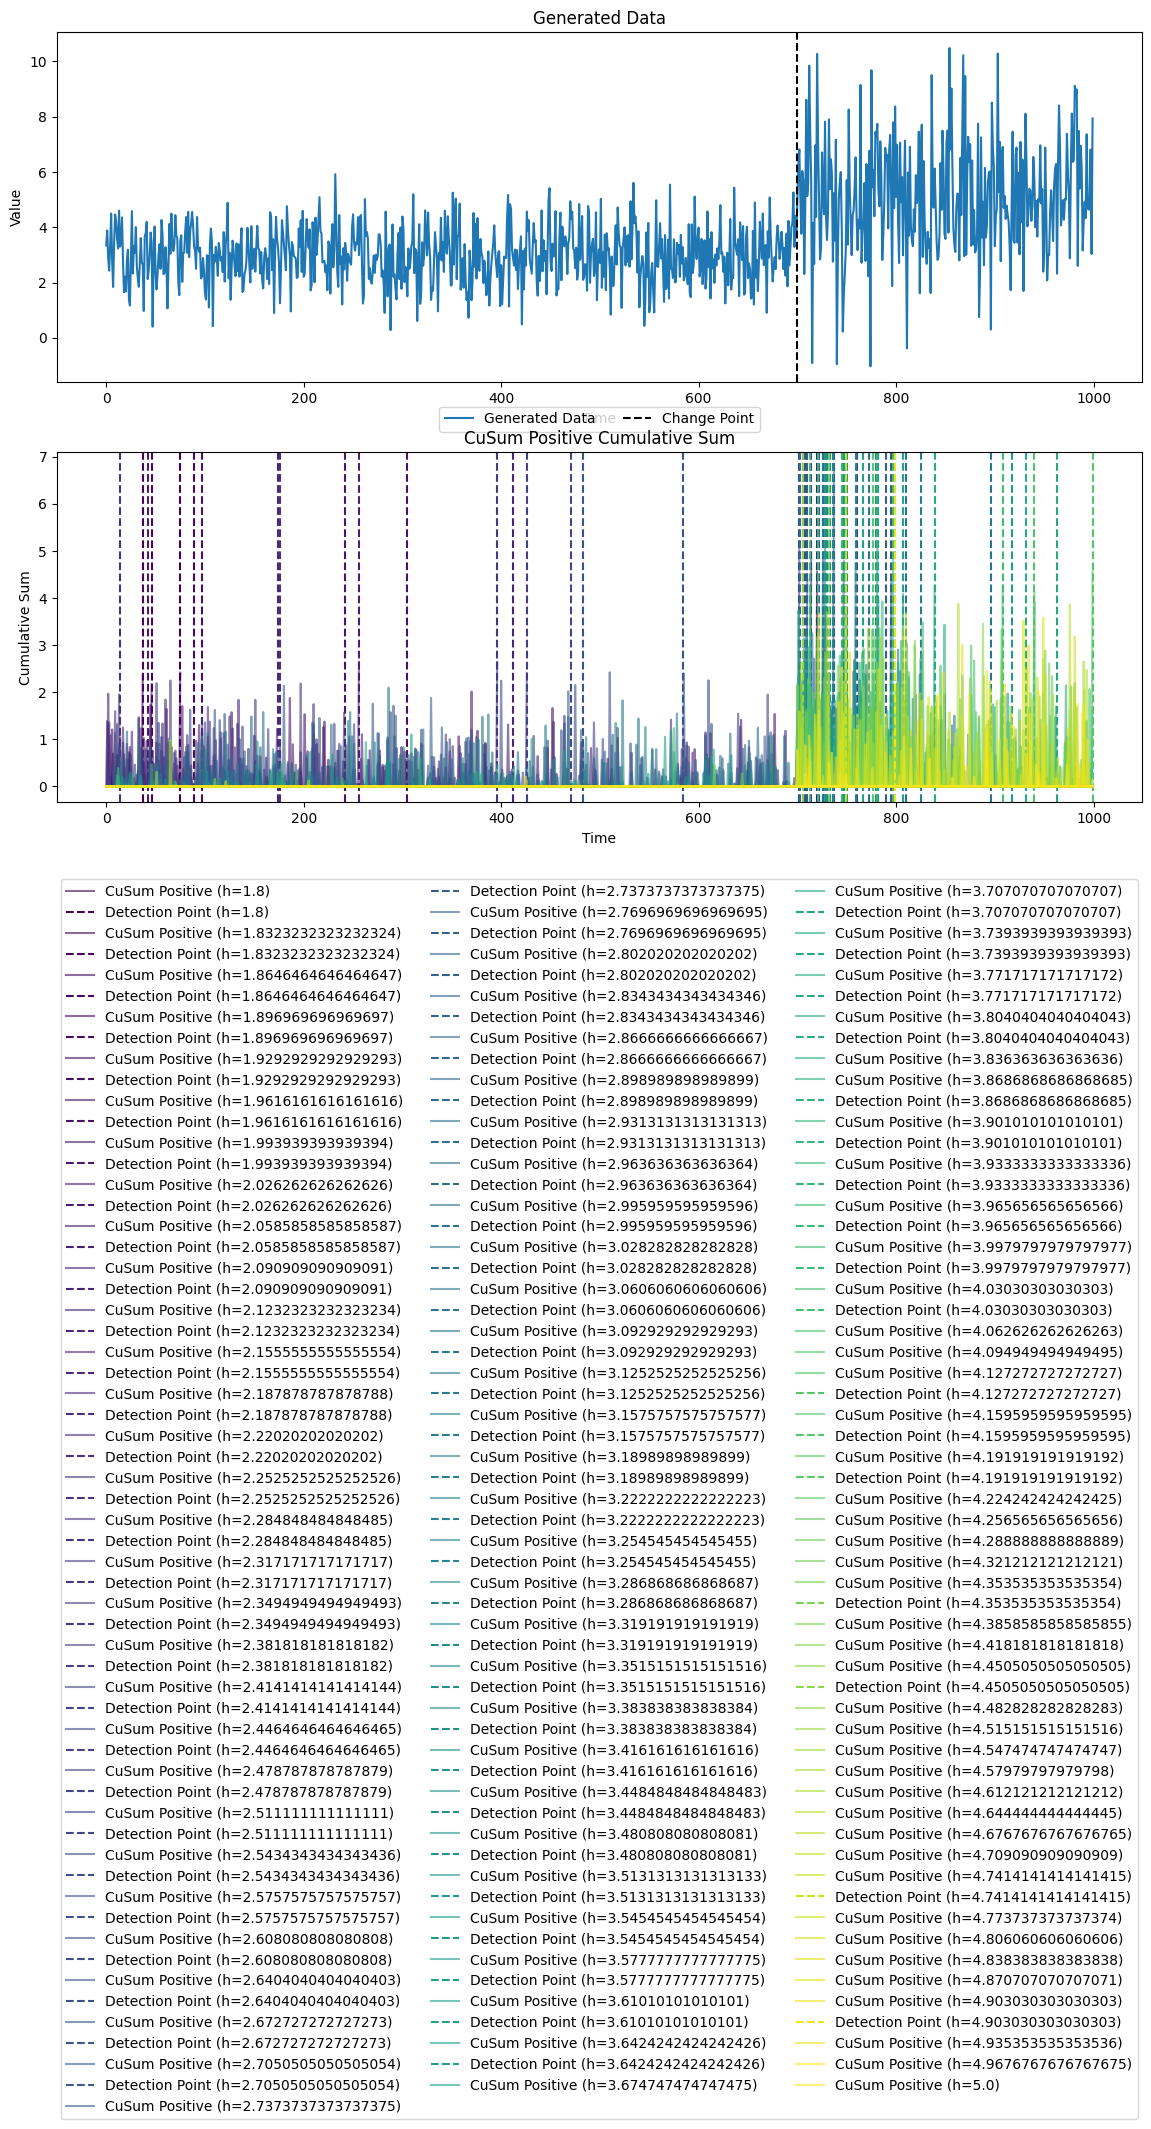

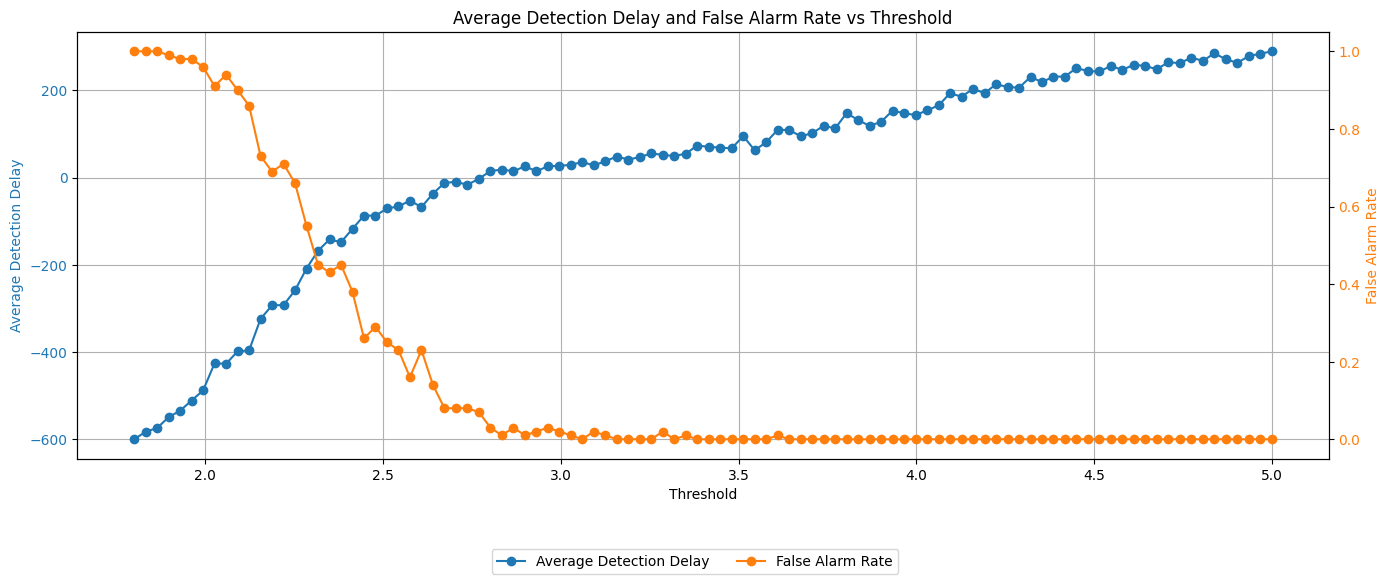

In [ ]:

n = 1000
change_point = 700
mean1, sigma1 = 3, 1
mean2, sigma2 = 5, 2  #
thresholds = np.linspace(1.8, 5, 100)

results = run_experiment(n, change_point, mean1, sigma1, mean2, sigma2, thresholds)

visualize_delays(thresholds, results)

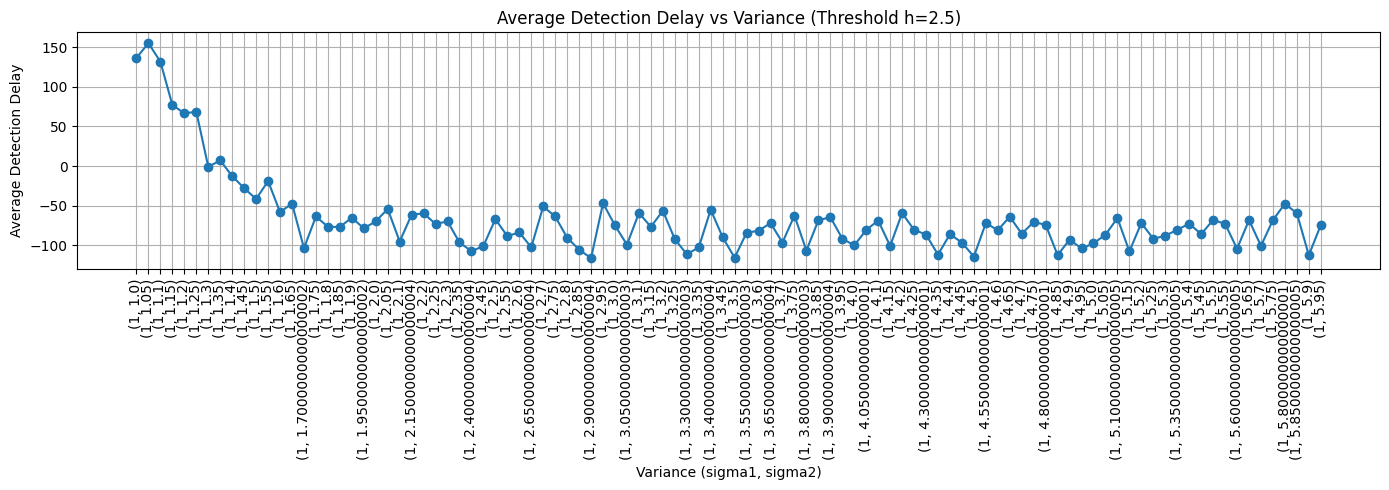

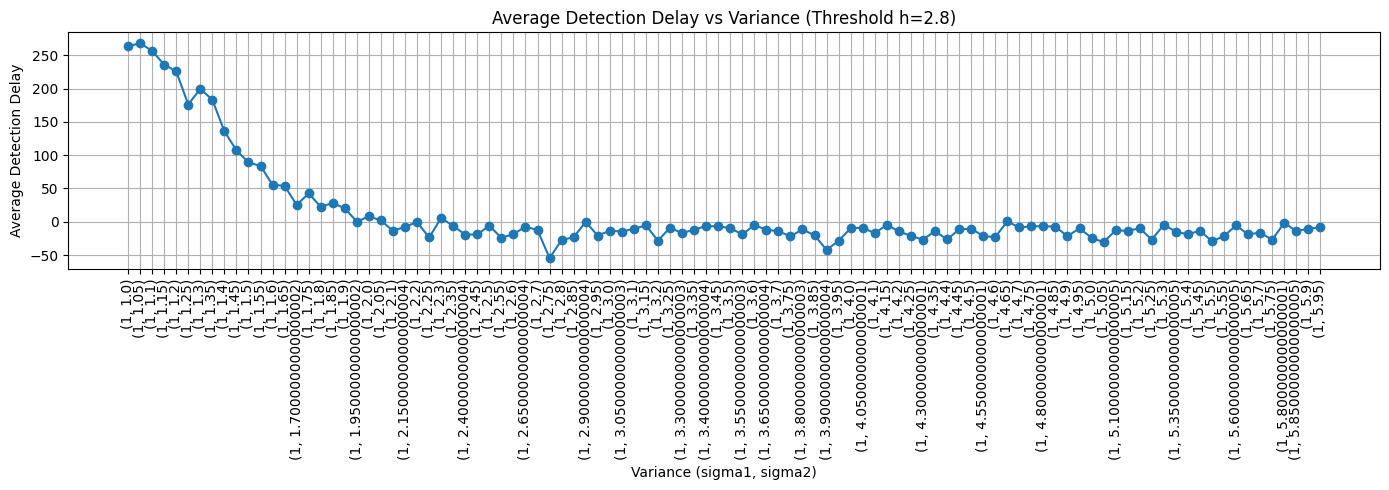

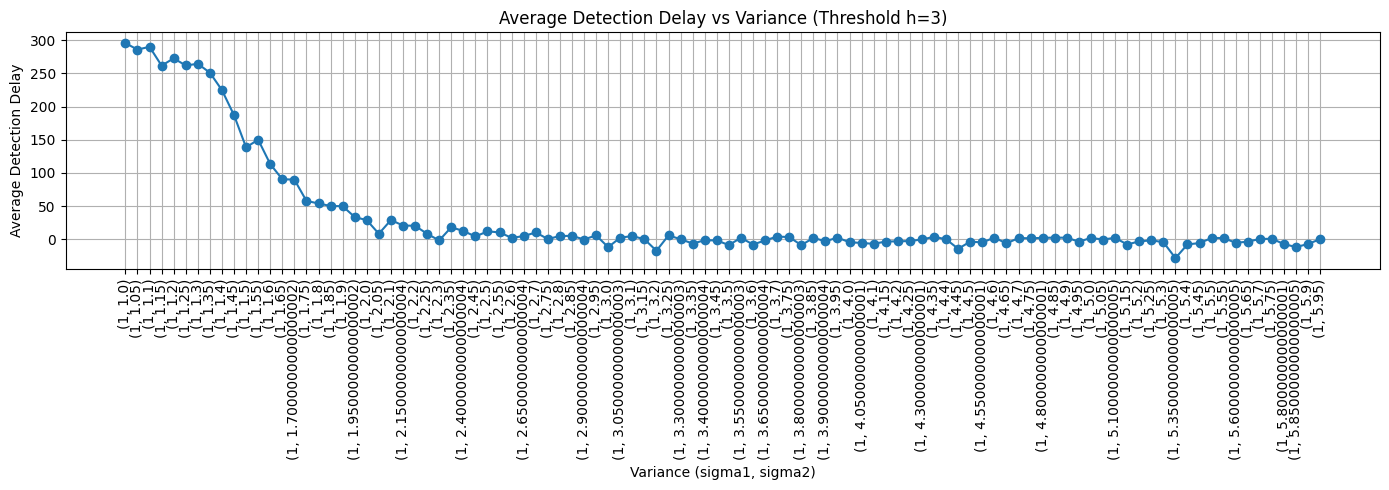

In [ ]:
def run_experiment_with_variance(n, change_point, mean1, sigma_values, mean2, h, num_experiments=100):
    """
    Run the CuSum detection experiment, fix the threshold h, change the variance of the generated data, calculate the detection delay, and visualize the results
    """
    avg_delays = []

    for sigma1, sigma2 in sigma_values:
        delays = []

        for _ in range(num_experiments):
            data = generate_data(n, change_point, mean1, sigma1, mean2, sigma2)
            detection_time, s_pos_list, s_neg_list = cusum(data, h)
            delay = detection_time - change_point
            delays.append(delay)

        avg_delay = np.mean(delays)
        avg_delays.append(avg_delay)
        # print(f"sigma1 = {sigma1}, sigma2 = {sigma2}, Average Delay = {avg_delay}")

    # 可视化结果
    sigma_labels = [f"({sigma1}, {sigma2})" for sigma1, sigma2 in sigma_values]
    plt.figure(figsize=(14, 5))
    plt.plot(sigma_labels, avg_delays, marker='o')
    plt.title(f'Average Detection Delay vs Variance (Threshold h={h})')
    plt.xlabel('Variance (sigma1, sigma2)')
    plt.ylabel('Average Detection Delay')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


n = 1000
change_point = 700
mean1, mean2 = 4, 6
sigma_values = [(1, 1 + i*0.05) for i in range(100)]
h = 3

run_experiment_with_variance(n, change_point, mean1, sigma_values, mean2, 2.5)
run_experiment_with_variance(n, change_point, mean1, sigma_values, mean2, 2.8)
run_experiment_with_variance(n, change_point, mean1, sigma_values, mean2, 3)